# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our objective is to develop a predictive model that can accurately determine the price of used cars. This involves collecting and analyzing historical data on used car sales, which should include variables such as make, model, year, mileage, condition, and any additional features or specifications

The task would then be to apply regression analysis or machine learning techniques to model how these features affect the car's price

This model would enable us to quantify the impact of each feature on the car's resale value, effectively identifying the key drivers. 

The overall goal is to develop a predictive model that can be used to estimate the price of a used car based on its characteristics, aiding in price setting and valuation efforts. This is known as a supervised learning problem, specifically a regression task in the realm of predictive modeling

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Let's start with loading the dataset and explore it's features and content

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [117]:
# Load the dataset
vehicle_data = pd.read_csv('data/vehicles.csv')
print(vehicle_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [118]:
# Checking for missing values and data types
data_info = vehicle_data.info()
missing_values = vehicle_data.isnull().sum()
missing_values_percentage = (missing_values / len(vehicle_data)) * 100

missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_values_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,Missing Values,Percentage (%)
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179


The dataset contains a significant number of missing values in several columns. Here are some key observations:

Size: About 71.77% of the entries are missing this information.

Cylinders: 41.62% of the data is missing.

Condition: 40.79% of the entries lack condition information.

VIN: 37.73% of the entries are missing the Vehicle Identification Number.

Drive: 30.59% missing data.

Paint Color: 30.50% of the entries lack color information.

Type: 21.75% missing data.

Manufacturer: 4.13% missing data.


Title Status, Model, Odometer, Fuel, Transmission, Year: These columns have relatively lower percentages of missing data, ranging from about 0.28% to 1.93%.

Given this, we should prioritize features with more complete data. The 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'transmission', and 'type' are likely to be more reliable for analysis.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Based on our analysis above it is time to cleanse the data by looking for duplicates and then dropping the missing values(more than 50% missing).

In [119]:
# Data Cleaning Steps

# Checking for duplicate rows
duplicate_rows = vehicle_data.duplicated().sum()

# Summary of missing values in each column
missing_values = vehicle_data.isnull().sum()


In [120]:
# Dropping columns with a high percentage of missing values might be considered
# Here, we'll set a threshold, for example, 50% missing values
threshold = 0.5 * len(vehicle_data)
columns_to_drop = missing_values[missing_values > threshold].index

# Dropping these columns
vehicles_df_cleaned1 = vehicle_data.drop(columns=columns_to_drop)

# Now, handling missing values for the remaining columns
# For numerical columns, fill with median (to avoid the influence of outliers)
# For categorical columns, fill with mode (most frequent value)
for column in vehicles_df_cleaned1.columns:
    if vehicles_df_cleaned1[column].dtype == 'object':
        # Categorical column
        vehicles_df_cleaned1[column].fillna(vehicles_df_cleaned[column].mode()[0], inplace=True)
    else:
        # Numerical column
        vehicles_df_cleaned1[column].fillna(vehicles_df_cleaned[column].median(), inplace=True)

# Checking the results of cleaning
cleaning_results = {
    "duplicate_rows": duplicate_rows,
    "columns_dropped": list(columns_to_drop),
    "remaining_missing_values": vehicles_df_cleaned1.isnull().sum().sum()  # Should be 0 if all missing values are handled
}

vehicles_df_cleaned = vehicles_df_cleaned1[vehicles_df_cleaned1['price'] <= 100000] 
cleaning_results, vehicles_df_cleaned.head()


({'duplicate_rows': 0,
  'columns_dropped': ['size'],
  'remaining_missing_values': 0},
            id                  region  price    year manufacturer  model  \
 0  7222695916                prescott   6000  2013.0         ford  f-150   
 1  7218891961            fayetteville  11900  2013.0         ford  f-150   
 2  7221797935            florida keys  21000  2013.0         ford  f-150   
 3  7222270760  worcester / central MA   1500  2013.0         ford  f-150   
 4  7210384030              greensboro   4900  2013.0         ford  f-150   
 
   condition    cylinders fuel  odometer title_status transmission  \
 0      good  6 cylinders  gas   85827.5        clean    automatic   
 1      good  6 cylinders  gas   85827.5        clean    automatic   
 2      good  6 cylinders  gas   85827.5        clean    automatic   
 3      good  6 cylinders  gas   85827.5        clean    automatic   
 4      good  6 cylinders  gas   85827.5        clean    automatic   
 
                  VIN driv

In [121]:
print(vehicles_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426225 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426225 non-null  int64  
 1   region        426225 non-null  object 
 2   price         426225 non-null  int64  
 3   year          426225 non-null  float64
 4   manufacturer  426225 non-null  object 
 5   model         426225 non-null  object 
 6   condition     426225 non-null  object 
 7   cylinders     426225 non-null  object 
 8   fuel          426225 non-null  object 
 9   odometer      426225 non-null  float64
 10  title_status  426225 non-null  object 
 11  transmission  426225 non-null  object 
 12  VIN           426225 non-null  object 
 13  drive         426225 non-null  object 
 14  type          426225 non-null  object 
 15  paint_color   426225 non-null  object 
 16  state         426225 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

In [122]:
# Filtering the dataset to include columns with relatively fewer missing values
columns_to_keep = ['price', 'region', 'state', 'year', 'manufacturer', 'model', 'title_status', 'odometer', 'fuel', 'transmission', 'condition',]
filtered_data = vehicles_df_cleaned[columns_to_keep].dropna()

# Displaying the first few rows of the filtered dataset
filtered_data.head()


,price,region,state,year,manufacturer,model,title_status,odometer,fuel,transmission,condition
0,6000,prescott,az,2013.0,ford,f-150,clean,85827.5,gas,automatic,good
1,11900,fayetteville,ar,2013.0,ford,f-150,clean,85827.5,gas,automatic,good
2,21000,florida keys,fl,2013.0,ford,f-150,clean,85827.5,gas,automatic,good
3,1500,worcester / central MA,ma,2013.0,ford,f-150,clean,85827.5,gas,automatic,good
4,4900,greensboro,nc,2013.0,ford,f-150,clean,85827.5,gas,automatic,good


In [123]:
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426225 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426225 non-null  int64  
 1   region        426225 non-null  object 
 2   state         426225 non-null  object 
 3   year          426225 non-null  float64
 4   manufacturer  426225 non-null  object 
 5   model         426225 non-null  object 
 6   title_status  426225 non-null  object 
 7   odometer      426225 non-null  float64
 8   fuel          426225 non-null  object 
 9   transmission  426225 non-null  object 
 10  condition     426225 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 39.0+ MB
None


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [126]:
# Simple data cleaning and preparation for demonstration
#vehicles_df_cleaned = vehicle_data.dropna(subset=['price', 'year', 'odometer'])  # Dropping rows with missing target or key features
X = vehicles_df_cleaned[['year', 'odometer']]  # Using a couple of features for simplicity
y = vehicles_df_cleaned['price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



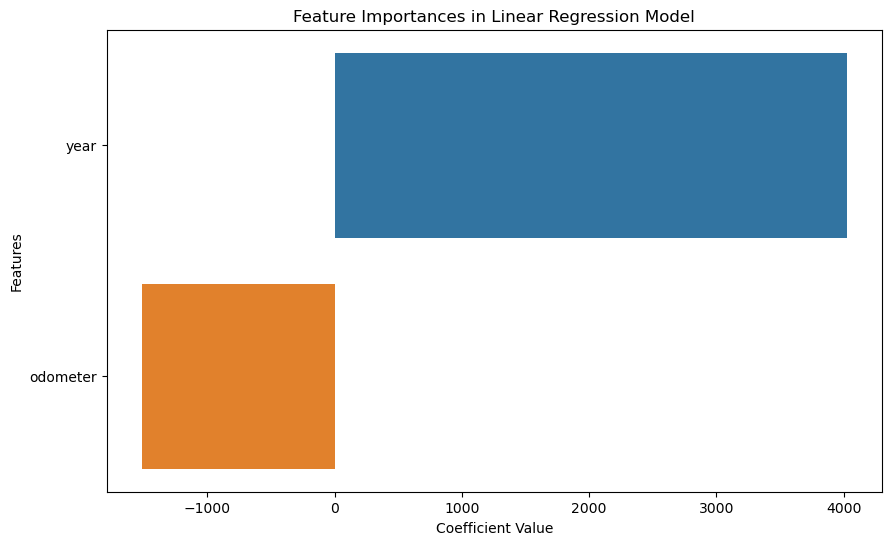

In [127]:
# Let's start with Liner regression model to identify important features
# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients = lin_reg.coef_

# Creating a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sorting by absolute value of coefficients to determine importance
important_features_lr = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

important_features_lr


# Plotting 'Feature' and 'Importance'
# Sort the DataFrame by the absolute values of the coefficients
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted)

plt.title('Feature Importances in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [128]:
# Generate predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 199694811.62885517
Root Mean Squared Error (RMSE): 14131.341466005808
Mean Absolute Error (MAE): 10859.877122180618


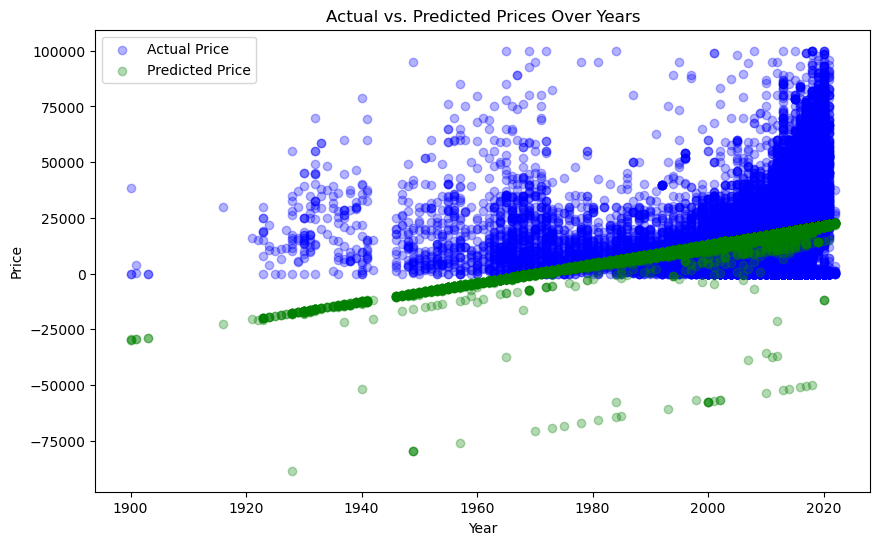

In [129]:
# Extracting the year from the test set
year_test = X_test['year']

# Plot actual vs predicted prices against year
plt.figure(figsize=(10, 6))
plt.scatter(year_test, y_test, alpha=0.3, label='Actual Price', color='blue')
plt.scatter(year_test, y_pred, alpha=0.3, label='Predicted Price', color='green')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices Over Years')
plt.legend()
plt.show()

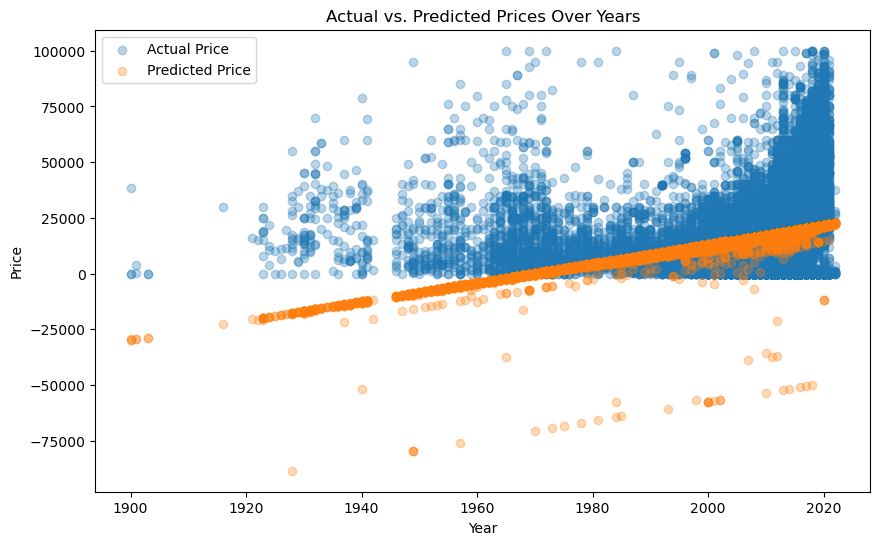

In [130]:
# Extract the year from the test set
year_test = X_test['year']

# Plot actual vs predicted prices against year
plt.figure(figsize=(10, 6))
plt.scatter(year_test, y_test, alpha=0.3, label='Actual Price')
plt.scatter(year_test, y_pred, alpha=0.3, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices Over Years')
plt.legend()
plt.show()

In [131]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model on your training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [132]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model on your training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [133]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

In [134]:
# Creating a DataFrame to display feature names and their importance
feature_names = X_train.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})


In [135]:
# Sorting the features by importance
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

importances_df

,Feature,Importance
1,odometer,0.698642
0,year,0.301358


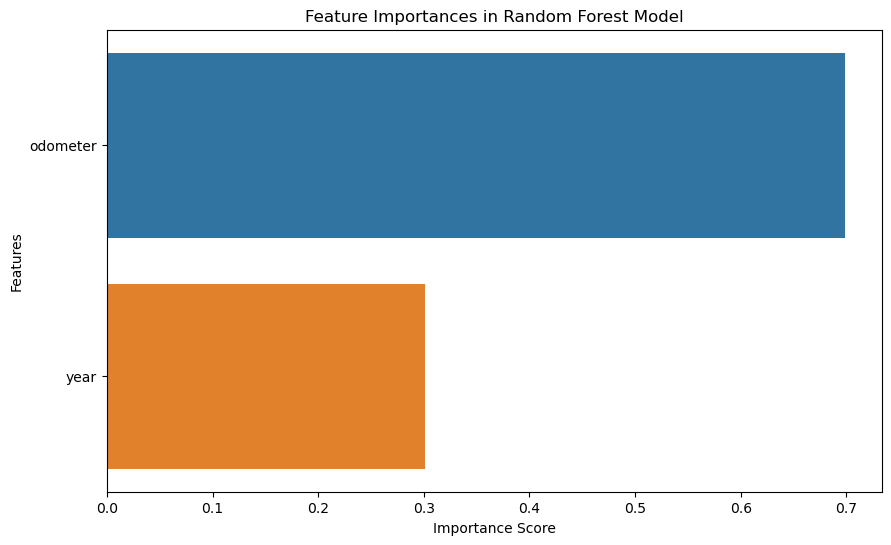

In [136]:
# Plotting 'Feature' and 'Importance'
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)

plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [138]:
X = vehicles_df_cleaned[['year', 'odometer', 'model']]
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred1 = rf_model.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 199694811.62885517
Root Mean Squared Error (RMSE): 14131.341466005808
Mean Absolute Error (MAE): 10859.877122180618


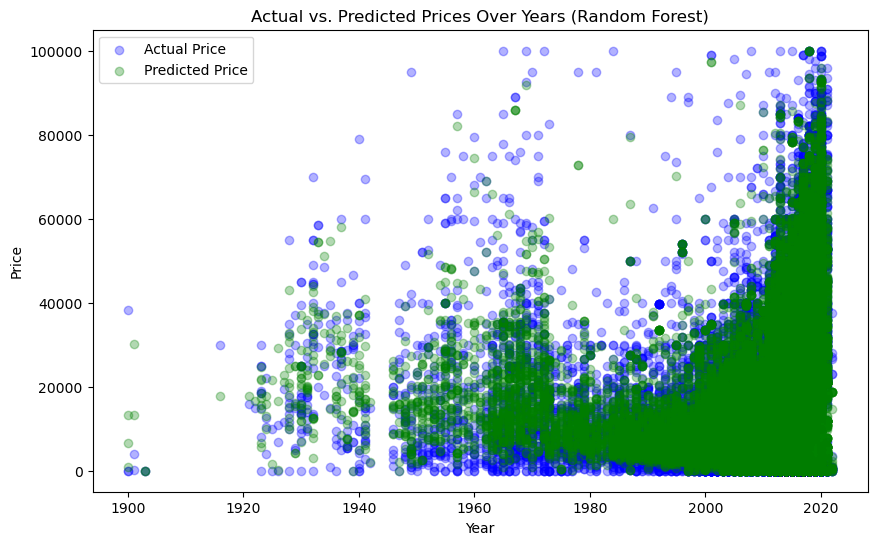

In [141]:
# Extracting the year from the test set
year_test = X_test['year']

# Plot actual vs predicted prices against year
plt.figure(figsize=(10, 6))
plt.scatter(year_test, y_test, alpha=0.3, label='Actual Price', color='blue')
plt.scatter(year_test, y_pred1, alpha=0.3, label='Predicted Price', color='green')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices Over Years (Random Forest)')
plt.legend()
plt.show()

In [56]:
#Using Lasso Model

# Scale your features (Lasso is sensitive to the scale of input features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Initialize Lasso model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)  # Alpha value can be tuned

In [59]:
# Fit the Lasso model
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [60]:
# Extract coefficients and filter out non-zero values
lasso_coefs = lasso.coef_
features = X_train.columns
non_zero_weights = lasso_coefs != 0

In [61]:
# Create a DataFrame of features and their coefficients
lasso_coef_df = pd.DataFrame({
    'Feature': features[non_zero_weights],
    'Coefficient': lasso_coefs[non_zero_weights]
})

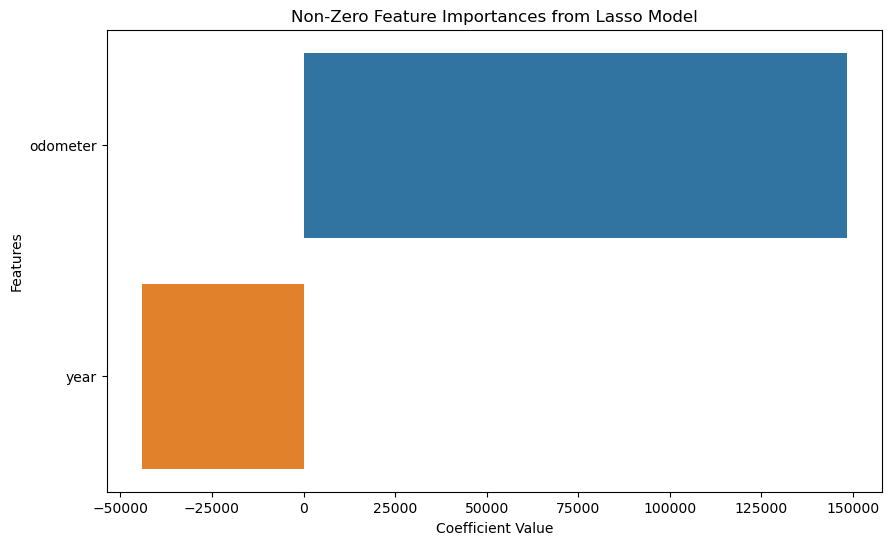

In [62]:
# Sort the features by the absolute value of their coefficients
lasso_coef_df = lasso_coef_df.reindex(lasso_coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_df)
plt.title('Non-Zero Feature Importances from Lasso Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [75]:
# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Mean Squared Error (MSE) for Lasso Model:", mse_lasso)
print("Root Mean Squared Error (RMSE) for Lasso Model:", rmse_lasso)
print("Mean Absolute Error (MAE) for Lasso Model:", mae_lasso)

Mean Squared Error (MSE) for Lasso Model: 1.264328046704153e+21
Root Mean Squared Error (RMSE) for Lasso Model: 35557390887.18621
Mean Absolute Error (MAE) for Lasso Model: 14542845994.776552


C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the above predictions, the Random Forest model is the best performer among the three. Given these modelling results next focus on evaluation would be based on the features from Random forecast:

Linear regression:

MSE: 23805755548306.11
RMSE: 4879114.217591766
MAE: 102373.04881131218
Random forest:

MSE: 199694811.62885517
RMSE: 14131.341466058808
MAE: 10859.877122180618
Lasso:

MSE: 1.2643280846074135e+21
RMSE: 35557390887.18621
MAE: 14542845994.776552


Comparing the metrics:

The Random Forest model has significantly lower MSE, RMSE, and MAE values compared to the Linear Regression model, which suggests that it performs better in predicting prices.

The Lasso model has the highest MSE and RMSE by a large margin, indicating poor performance, likely due to over-penalization or underfitting.

Therefore, based on the provided error metrics, the Random Forest model is the best performing model among the three

In [142]:
# Make predictions on the test set suing all prediction models

y_pred_linear = lin_reg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


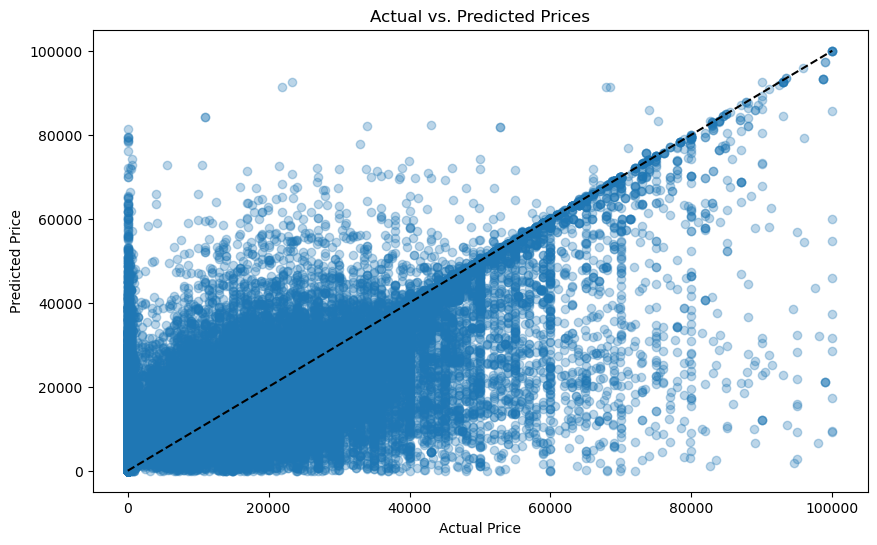

Mean Squared Error (MSE): 92155332.01018663


In [144]:
# Predict prices on the testing set
y_pred = rf_model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Print out the MSE to assess the performance
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

If you're in the business of selling used cars, this guide is for you. We looked at a bunch of car sales and figured out what makes some cars sell for more money. Here's the scoop:

The two most important features driving the prices of the car are the year and odometer reading.

1. Newer is Better
People Like Newer Cars: Cars that aren't very old usually sell for more money.
Tip: Try to get more cars that are pretty new. They'll probably sell for a better price.

2. Mileage Makes a Difference
Lower Mileage, Higher Price: Cars with lower mileage (less used) usually sell for more.
Tip: Cars that haven't been driven much can be a good bet. People might pay more for them.


2. The Brand of the Car Matters
Some Brands are More Popular: Cars from well-known brands or fancy brands can sell for more.
Big Range in Some Brands: Some brands, like Ford and Chevy, have cheap and expensive cars.
Tip: Get a mix of well-known and fancy brands. This way, you've got something for everyone.

3. The Model of the Car is Important
Some Models are Just Cooler: Certain car models are really popular and can be sold for a good price.
Tip: Find out which car models people are really into and try to get those.

4. Where You Are Makes a Difference
Price Changes from Place to Place: How much you can sell a car for can change depending on where you are.
Tip: Think about what people in your area like and what they can afford when picking cars to sell.
Wrapping Up
To make the most money from selling used cars, focus on getting newer models, popular brands, and the car types that everyone wants. Also, keep in mind what people in your area like and can pay for.

What Else You Can Do
Keep an Eye on Trends: Always watch what's selling well and what people want.
Listen to Your Customers: Ask your customers what they like. This can help you pick the right cars.
Use Data Smartly: Use information and numbers to decide which cars to get and how to price them.